In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.funcs as funcs
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

from sklearn.preprocessing import scale

In [6]:
df = pd.read_csv("data/mammals.csv", sep=',')
df

,name,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


In [7]:
df.dropna(inplace=True)
df

,name,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


In [12]:
X = np.c_[(df['body_wt'],df['brain_wt'],df['life_span'],df['gestation'])]
X0 = X

In [13]:
# X0 = scale(X0)
X0 = np.log(X0)
N = len(X0)
print(X0[:10])

[[ 0.          1.88706965  1.5040774   3.73766962]
 [ 7.84267147  8.43446354  4.2341065   6.43615037]
 [ 2.35612586  5.19017521  3.29583687  5.19295685]
 [-3.77226106 -1.2039728   2.94443898  3.55534806]
 [ 5.07517382  5.12989871  3.41444261  5.97126184]
 [ 1.19392247  3.24259235  3.33220451  4.14313473]
 [ 3.95431592  6.08677473  3.91202301  5.43807931]
 [-0.85566611  1.85629799  1.94591015  4.71849887]
 [ 6.14203741  6.04737218  3.40119738  5.63835467]
 [-2.59026717  0.18232156  1.25276297  3.73766962]]


[0.80399472 2.78436034 2.48295483 4.37450478]


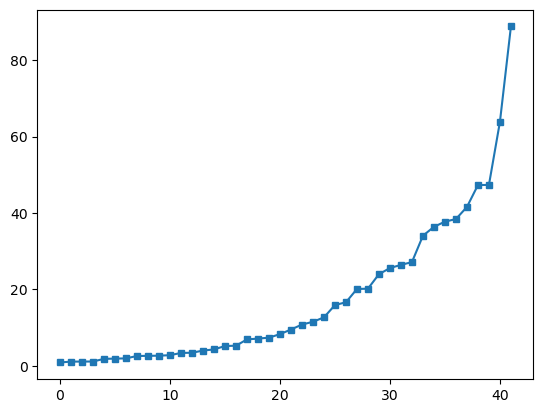

In [20]:
c0 = pca.find_center(X0)
print(c0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=4)
plt.show()

[0.80399472 2.78436034 2.48295483 4.37450478]


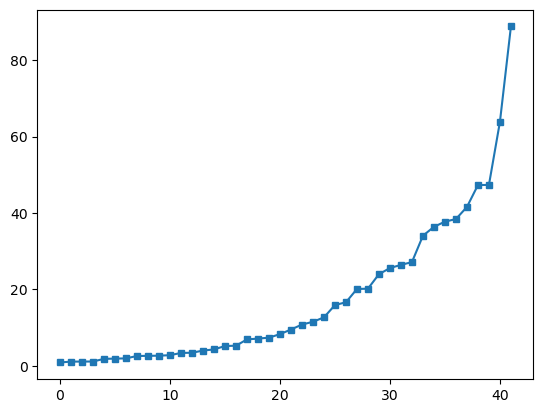

In [36]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.001), alpha=(N-4)/N)
c = pca.find_rob_center(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=4)
plt.show()

In [37]:
X1 = X0 - c
X1_0 = X0 - c0

In [38]:
a1_0, L1_0 = pca.find_pc(X1_0)
print(L1_0, a1_0)

16.19475994368852 [0.744157   0.60707063 0.1934454  0.20068503]


In [39]:
a1, L1 = pca.find_rob_pc(X1, wma)
print(L1, a1)

14.333021811280474 [0.73902944 0.59916182 0.23239783 0.20206893]


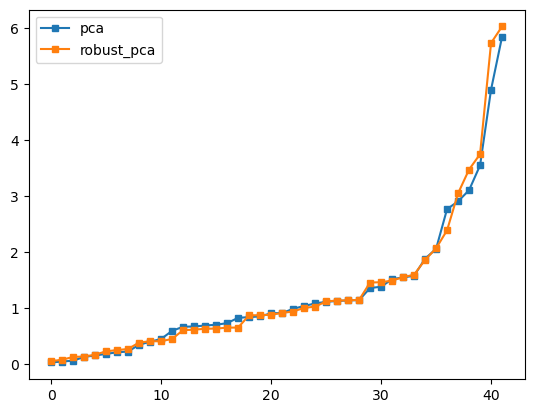

In [40]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

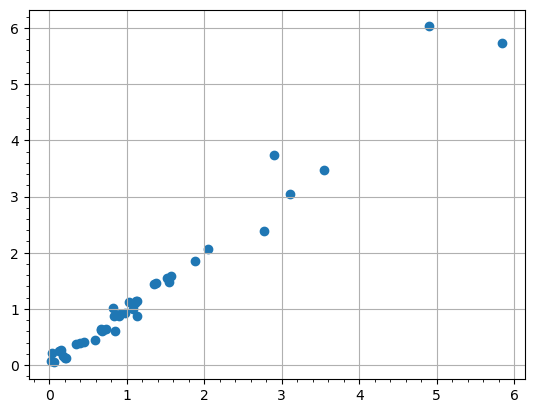

In [41]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [42]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

In [43]:
a2_0, L2_0 = pca.find_pc(X2_0)
print(L2_0, a2_0)

0.674999554427873 [-0.54243436  0.3057767   0.52777892  0.57768069]


In [44]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=(N-4)/N)
a2, L2 = pca.find_rob_pc(X2, wma)
print(L2, a2)

0.6356772573117538 [-0.56862869  0.35955008  0.28911899  0.68102523]


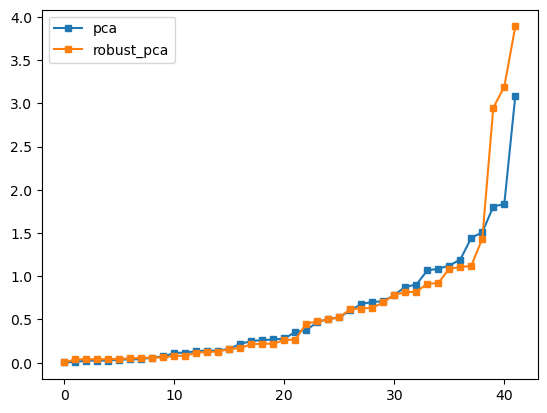

In [45]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


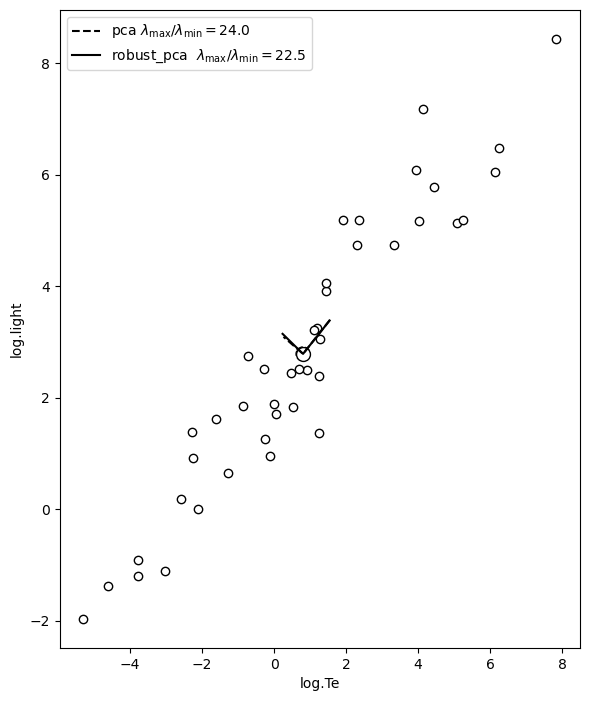

In [46]:
aa = 16/9
plt.figure(figsize=(6,4*aa))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]+a1_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]+a1_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--', label=r'pca $\lambda_\max/\lambda_\min=%.1f$' % (max(L2_0,L1_0)/min(L2_0,L1_0)))
plt.plot([c[0]+a1[0], c[0], c[0]+a2[0]], [c[1]+a1[1], c[1], c[1]+a2[1]], 
         c='k', label='robust_pca  $\lambda_\max/\lambda_\min=%.1f$' % (max(L2,L1)/min(L2,L1)))
plt.legend()
# plt.xticks([])
# plt.yticks([])
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.tight_layout()
plt.savefig('fig/robust_pca_starsCYG.eps')
plt.show()

In [47]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [48]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=(N-4)/N)
S = robust_scatter_matrix(X1, wma)
print(S)

[[ 1.03442158 -1.83389312  1.30222349  0.44129341]
 [-1.83389312  4.1361895  -3.8148651  -1.14206798]
 [ 1.30222349 -3.8148651   6.0575676  -0.13887084]
 [ 0.44129341 -1.14206798 -0.13887084  1.84409377]]


In [49]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 0.2481776  -0.24143185  0.72315664 -0.59763117]
 [-0.61585346  0.3794269   0.60818822  0.32690493]
 [ 0.74218993  0.4873727   0.23488507  0.39553882]
 [ 0.09103021 -0.74847428  0.22799247  0.61605129]]


-5.551115123125783e-17

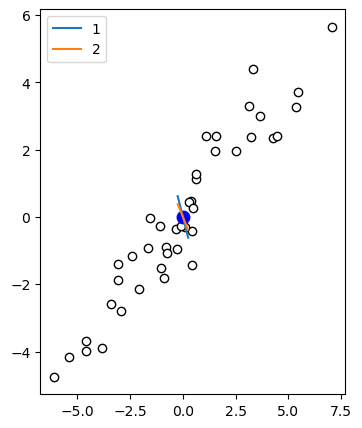

In [50]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(X1[:,0], X1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca_sk = PCA()
pca_sk.fit(X0)
AA = pca_sk.components_
print(AA)
pca_sk.mean_

[[ 0.744157    0.60707063  0.19344539  0.20068503]
 [ 0.54243436 -0.3057767  -0.52777891 -0.5776807 ]
 [-0.0691218   0.11529017  0.66563834 -0.73406808]
 [ 0.38368932 -0.72434386  0.49087055  0.29521953]]


array([0.80399472, 2.78436034, 2.48295483, 4.37450478])

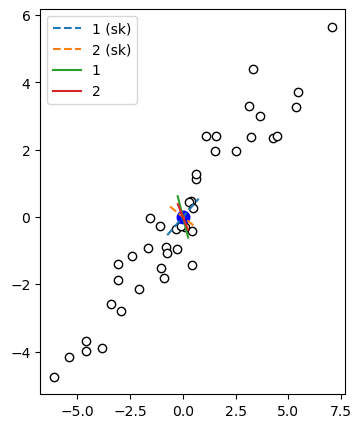

In [53]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(X1[:,0], X1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-AA[0,0], 0, AA[0,0]], [-AA[1,0], 0, AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-AA[0,1], 0, AA[0,1]], [-AA[1,1], 0, AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()